In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

%matplotlib inline
%config inlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette = 'muted', font_scale=1.3)
RANDOM_SEED = 42

rcParams['figure.figsize'] = 22,19

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
filename = (r'E:\Tensorflow\finalyr_project\models\DatasetVer2.csv')
df_car = pd.read_csv(filename)
df_car.Timestamp = df_car.apply(pd.to_datetime)
df_car.head()

,Timestamp,Car_count
0,2020-09-23 00:00:00,2
1,2020-09-23 00:01:00,2
2,2020-09-23 00:02:00,2
3,2020-09-23 00:03:00,3
4,2020-09-23 00:04:00,3


In [3]:
df_car.Timestamp = pd.to_datetime(df_car.Timestamp,  infer_datetime_format=True)
df_car.index = df_car.Timestamp
df_car.head()

,Timestamp,Car_count
Timestamp,,
2020-09-23 00:00:00,2020-09-23 00:00:00,2
2020-09-23 00:01:00,2020-09-23 00:01:00,2
2020-09-23 00:02:00,2020-09-23 00:02:00,2
2020-09-23 00:03:00,2020-09-23 00:03:00,3
2020-09-23 00:04:00,2020-09-23 00:04:00,3


In [4]:
df_car.tail()

,Timestamp,Car_count
Timestamp,,
2020-11-19,2020-11-19,21
2020-11-20,2020-11-20,22
2020-11-21,2020-11-21,25
2020-11-22,2020-11-22,24
2020-11-23,2020-11-23,28


In [5]:
y = df_car['Car_count']
y.dropna(inplace = True)
y.head()

Timestamp
2020-09-23 00:00:00    2
2020-09-23 00:01:00    2
2020-09-23 00:02:00    2
2020-09-23 00:03:00    3
2020-09-23 00:04:00    3
Name: Car_count, dtype: int64

In [6]:
X = [x for x in range(0, len(y))]

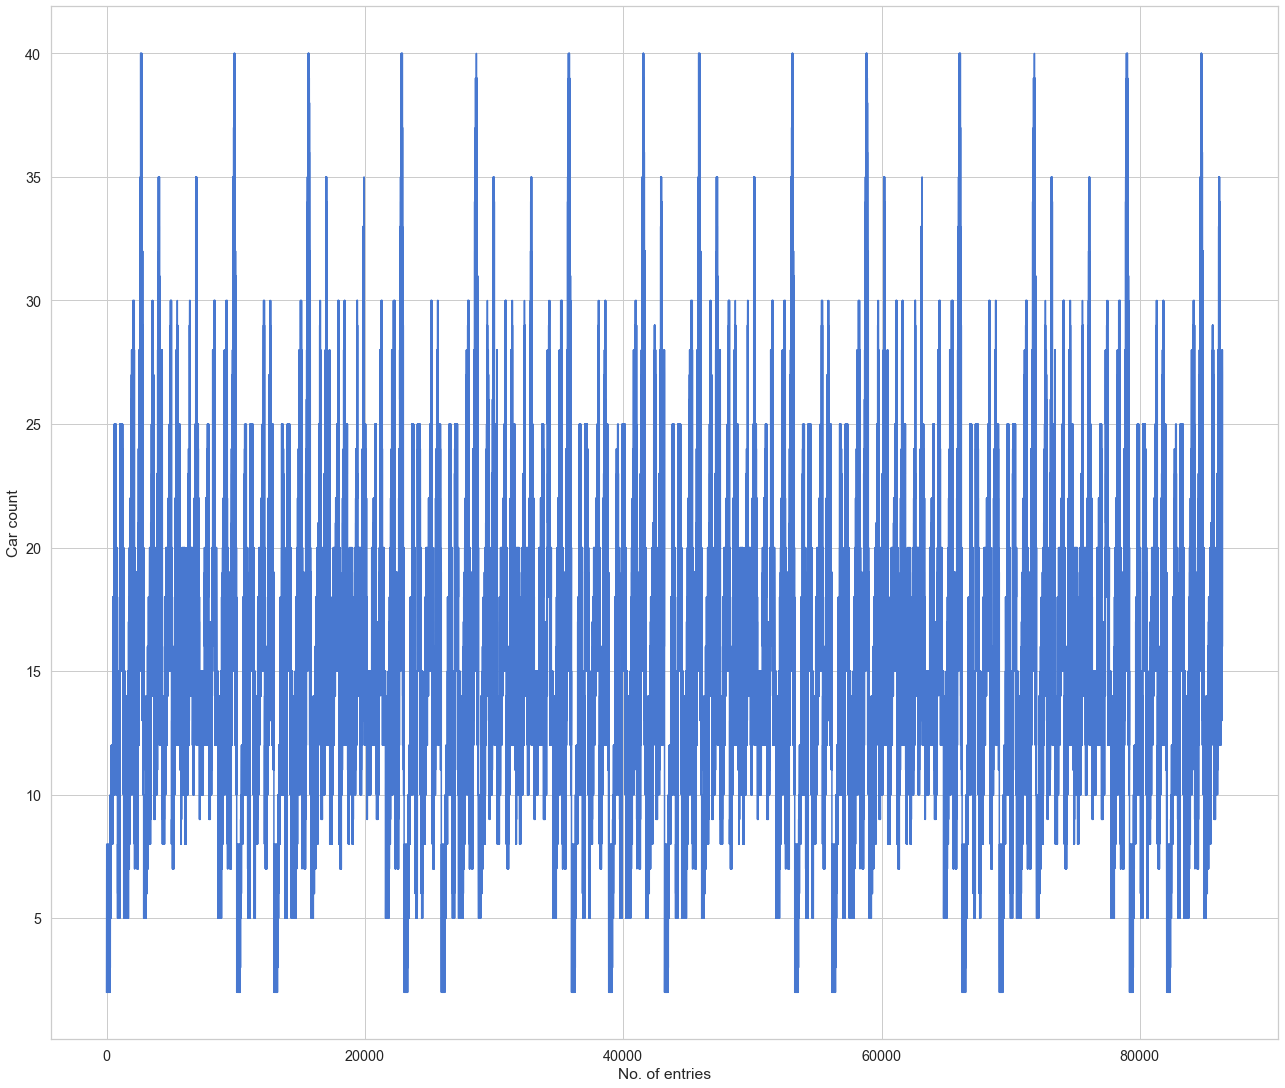

In [14]:
plt.plot(X, y)
plt.ylabel('Car count')
plt.xlabel('No. of entries')
plt.savefig('input_data.png', bbox_inches='tight')
plt.show()

In [8]:
np.random.seed(42)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
mms_y = scaler.fit_transform(y.values.reshape(-1,1))

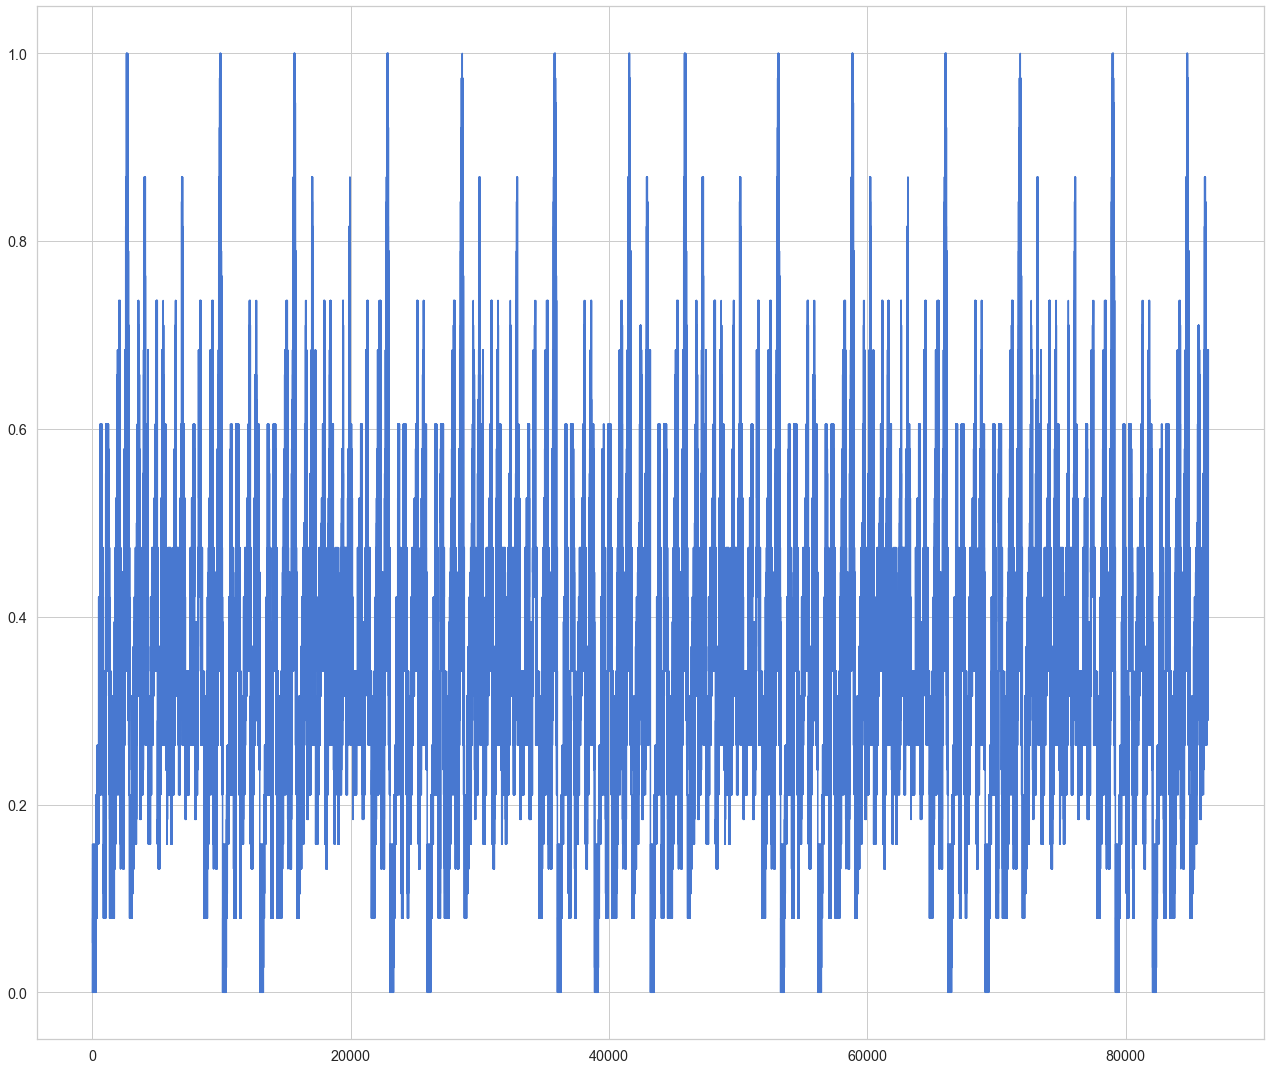

In [11]:
plt.plot(X, mms_y)
plt.show()

In [12]:
train_size = int(len(mms_y) * 0.70)
test_size = len(mms_y) - train_size
train, test = mms_y[0:train_size,:], mms_y[train_size:len(mms_y),:]
print(len(train), len(test))

60480 25921


In [13]:
def simple_look(dataset, look_back=1):
    dataX = dataset[:-(look_back + 1), 0]
    dataY = dataset[look_back:-1, 0]
    return np.reshape(dataX, (len(dataX), 1)), np.reshape(dataY, (len(dataY), 1))

In [14]:
look_back = 1
trainXb, trainYb = simple_look(train, look_back)
testXb, testYb = simple_look(test, look_back)

In [15]:
trainXb.shape

(60478, 1)

In [16]:
type(trainXb[1])

numpy.ndarray

In [17]:
trainX = np.reshape(trainXb, (trainXb.shape[0], 1, trainXb.shape[1]))
testX = np.reshape(testXb, (testXb.shape[0], 1, testXb.shape[1]))

In [18]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

model = keras.Sequential()
model.add(keras.layers.LSTM(32,return_sequences=True, input_shape=(1, look_back)))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             4352      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 64)             24832     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 42,689
Trainable params: 42,689
Non-trainable params: 0
____________________________________________________

In [ ]:
and_i_stop = EarlyStopping(monitor = 'loss', patience = 4, mode = 'auto')
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse','mae'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph/LSTM', histogram_freq=0, write_graph=True, write_images=True)
history = model.fit(trainX, trainYb, epochs=100, callbacks = [and_i_stop, tbCallBack], batch_size=8, verbose=1, validation_data=(testX, testYb), validation_steps = 4)

Epoch 1/100
7560/7560 [==============================] - 45s 6ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0097 - val_mse: 0.0097 - val_mae: 0.0744
Epoch 2/100
7560/7560 [==============================] - 39s 5ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0918 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0767
Epoch 3/100
7560/7560 [==============================] - 39s 5ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0783
Epoch 4/100
7560/7560 [==============================] - 38s 5ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0916 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0808
Epoch 5/100
7560/7560 [==============================] - 39s 5ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0915 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0816
Epoch 6/100
2636/7560 [=========>....................] - ETA: 27s - loss: 0.0140 - mse: 0.0140 - mae: 0.0922

## The ideal MSE isn't 0, since then you would have a model that perfectly predicts your training data, but which is very unlikely to perfectly predict any other data. What you want is a balance between overfit (very low MSE for training data) and underfit (very high MSE for test/validation/unseen data). It looks like you are currently overfitting slightly (because training MSE is lower than validation MSE), but the R2 isn't much lower, so - unless you really need to explore the tradeoff - your model should be useful to predict data that you haven't yet seen.

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


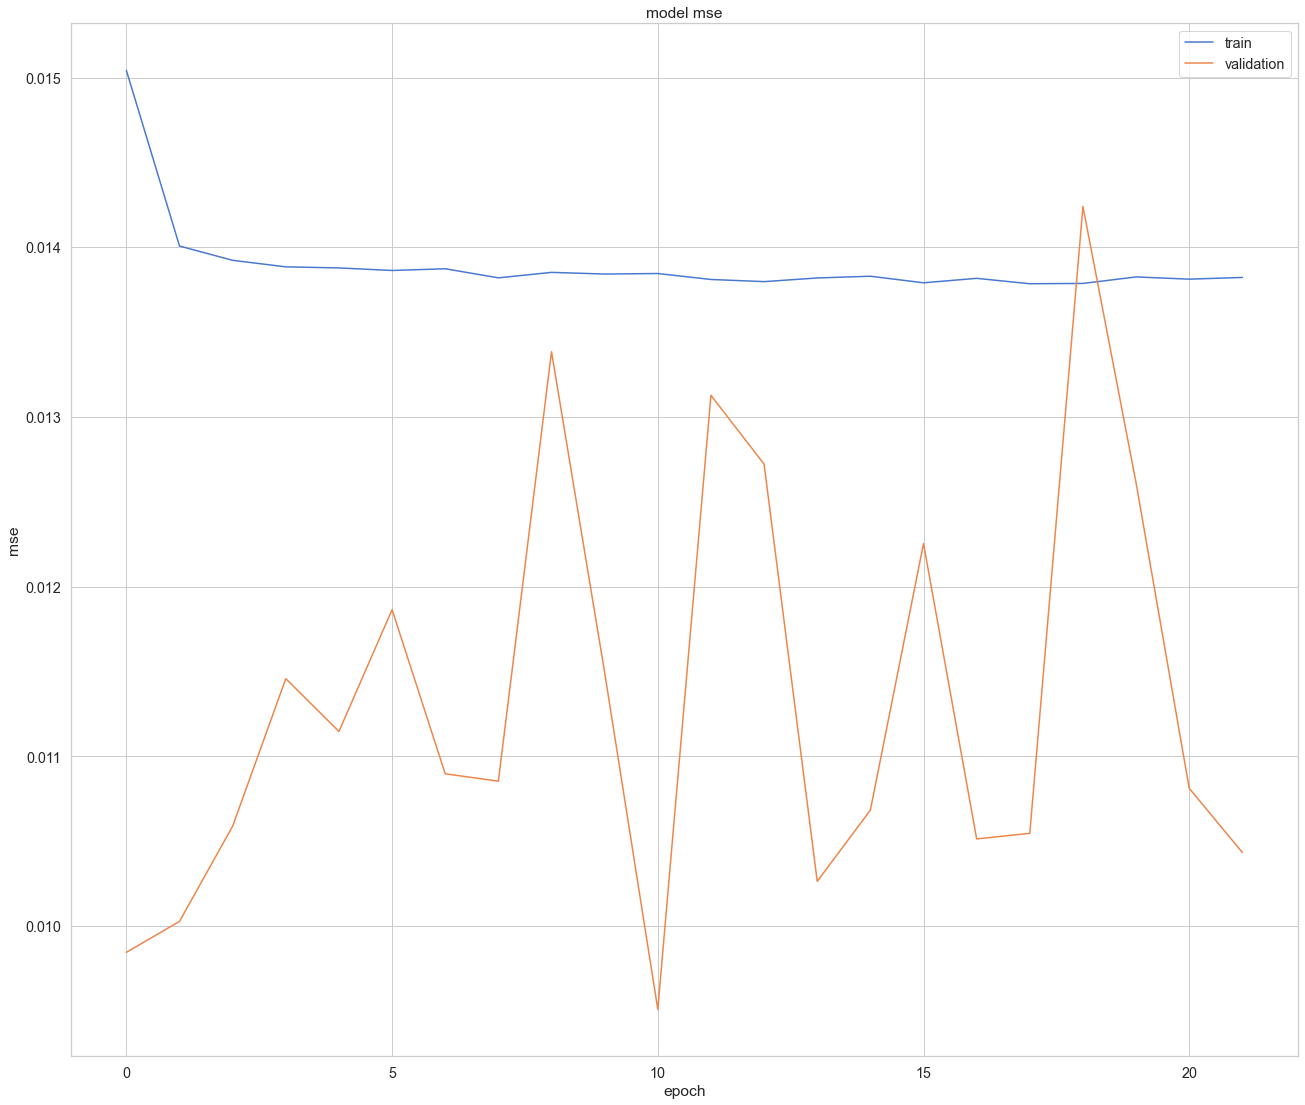

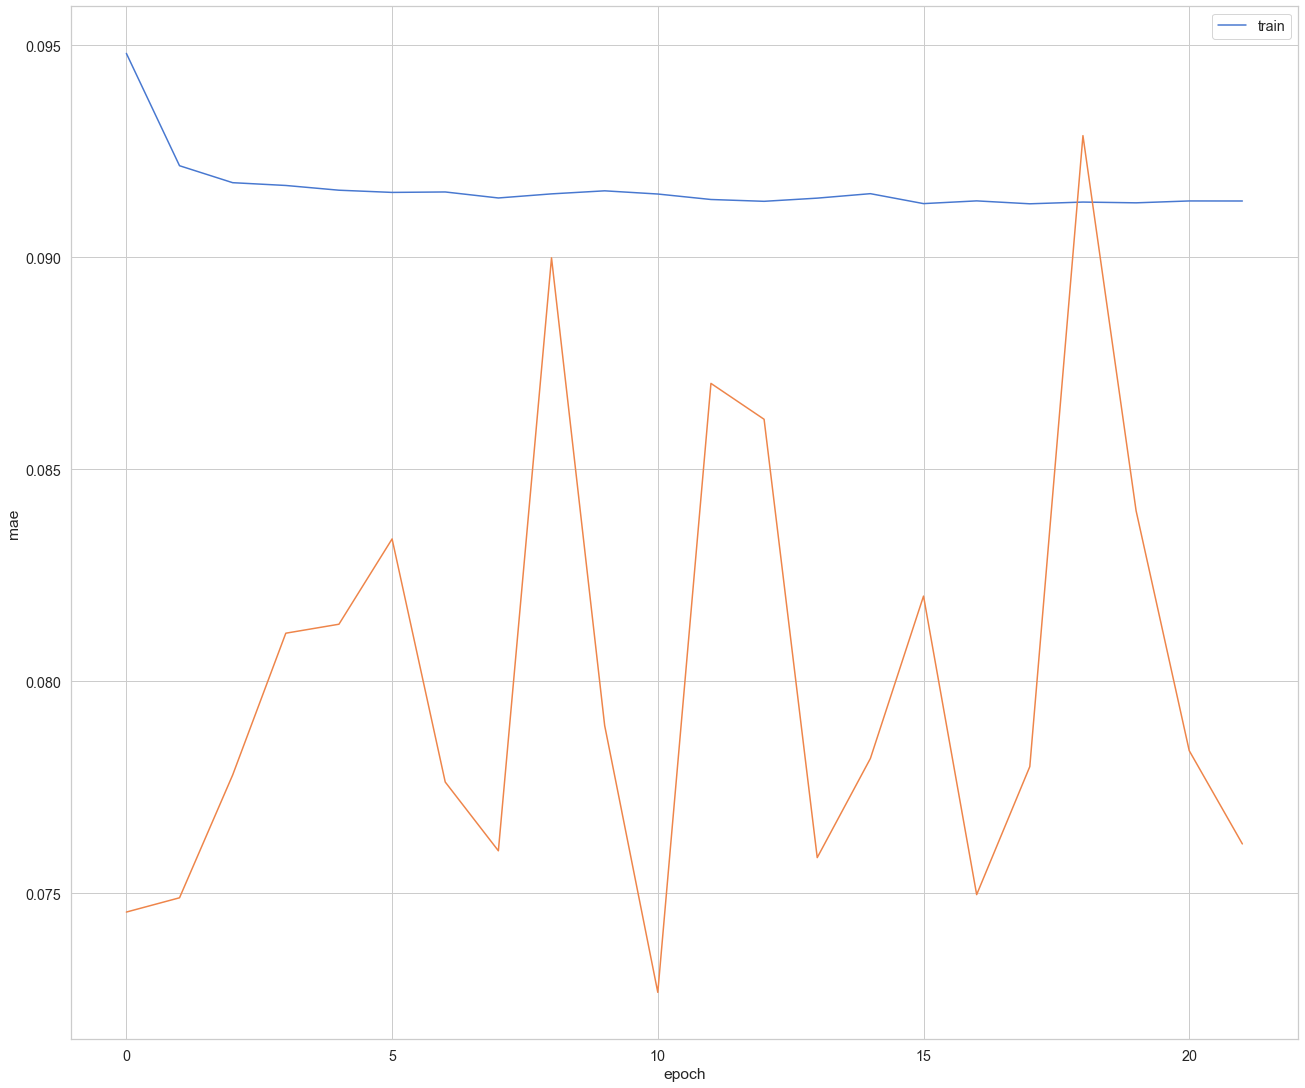

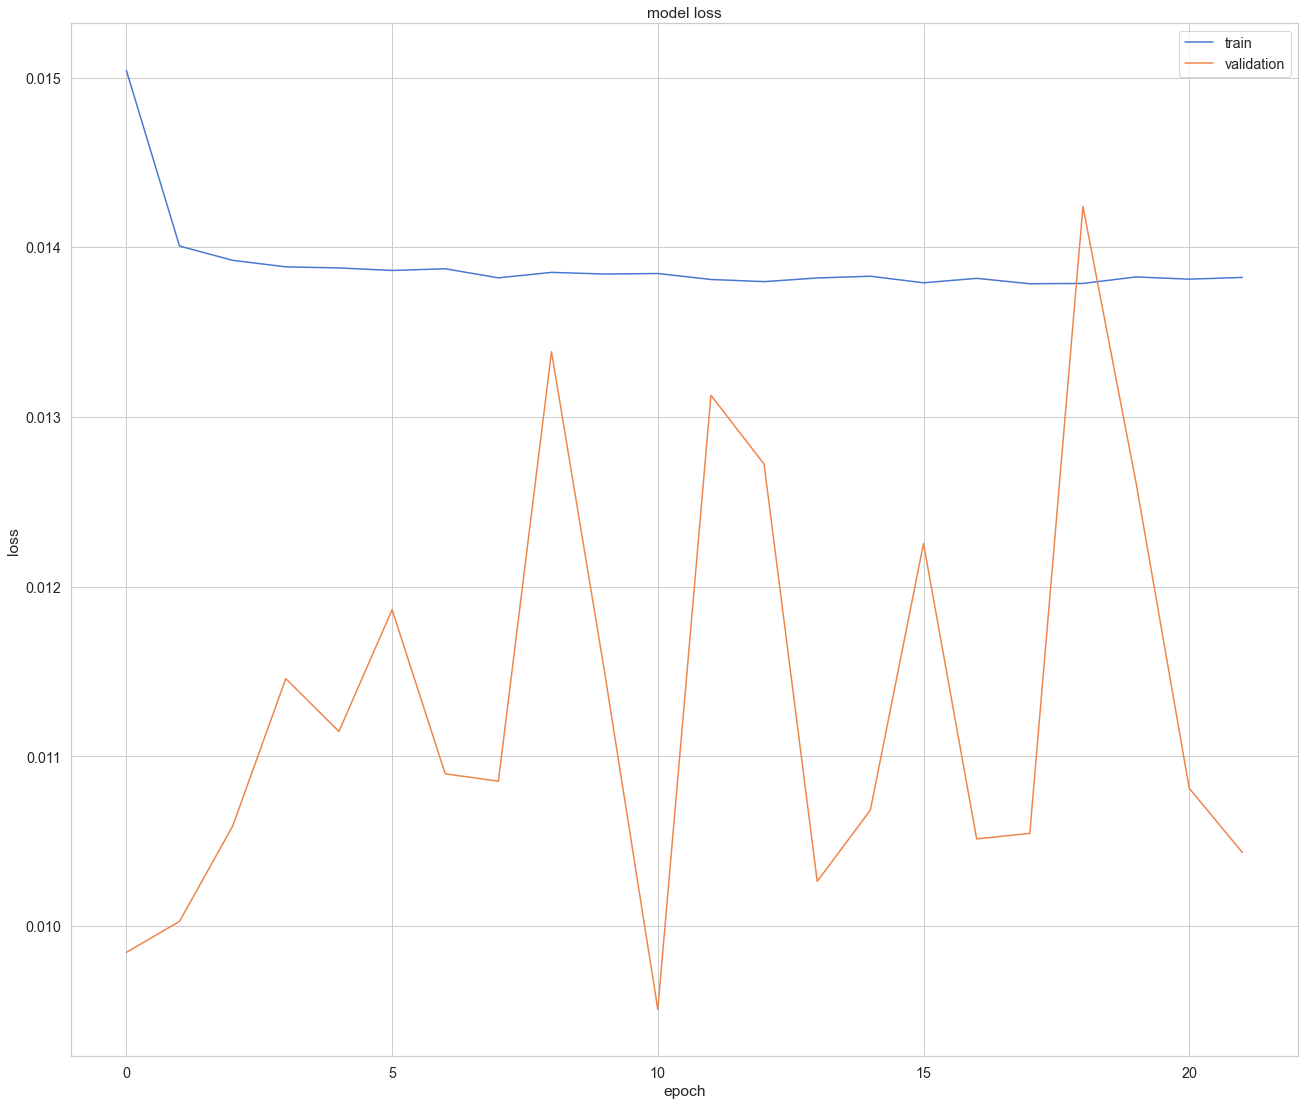

In [23]:
%config inlineBackend.figure_format='retina'
print(history.history.keys())
#mse & mae
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.savefig('lstm_mse.png')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.savefig('lstm_mae.png')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper right')
plt.savefig('LSTM_loss.png')
plt.show()

In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainYb)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testYb)
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.37 RMSE
Test Score: 4.32 RMSE


In [21]:
model.save('Lstm_V2A')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Lstm_V2A\assets


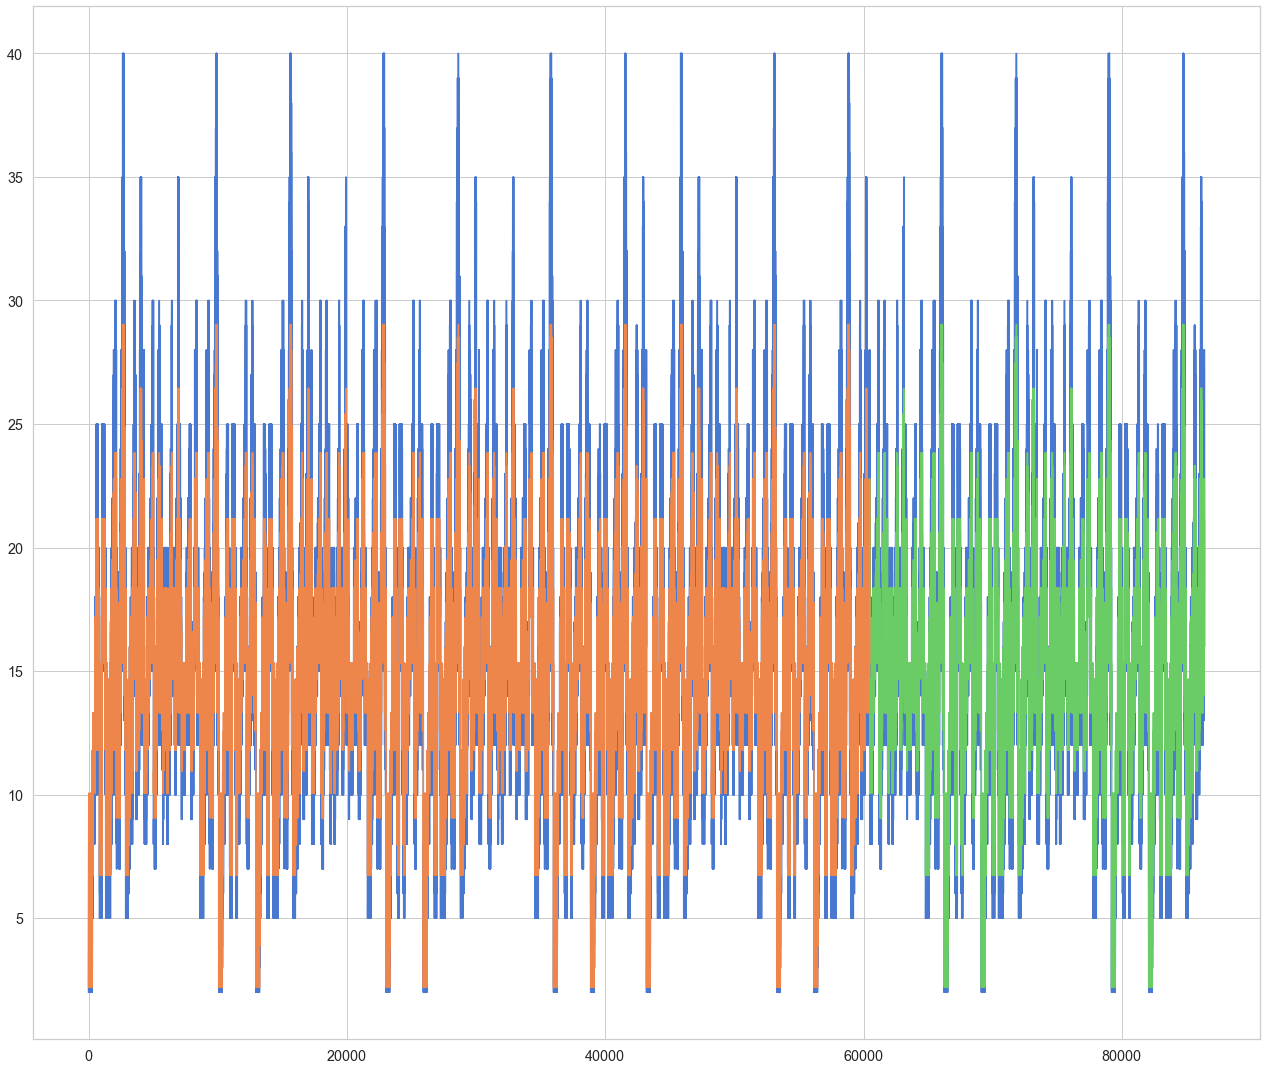

In [25]:
trainPredictPlot = np.empty_like(mms_y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift test predictions for plotting
testPredictPlot = np.empty_like(mms_y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(mms_y)-1, :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(mms_y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('lstm_pred.png')
plt.show()
# plt.savefig('TrainPred.png')
# Image.open('TrainPred.png').save('testplot.jpg','JPEG')

In [23]:
trainPredictPlot[:,0]

array([       nan, 2.21491694, 2.21491694, ...,        nan,        nan,
              nan])

In [24]:

df_car_prediction = pd.DataFrame(data = {'Time_step':X,
                                             'Observed': y, 
                                             'Train_Prediction':trainPredictPlot[:,0], 
                                             'Test_Prediction':testPredictPlot[:,0]},
                                    index = y.index,)
df_car_prediction = pd.DataFrame(data = {'Time_step':X,
                                             'Observed': y, 
                                             'Train_Prediction':trainPredictPlot[:,0], 
                                             'Test_Prediction':testPredictPlot[:,0]},
                                    index = y.index,)

In [25]:
df_car_prediction.head()

,Time_step,Observed,Train_Prediction,Test_Prediction
Timestamp,,,,
2020-09-23 00:00:00,0,2,NaN,NaN
2020-09-23 00:01:00,1,2,2.214917,NaN
2020-09-23 00:02:00,2,2,2.214917,NaN
2020-09-23 00:03:00,3,3,2.214917,NaN
2020-09-23 00:04:00,4,3,3.873900,NaN


In [26]:
df_car_prediction.tail()

,Time_step,Observed,Train_Prediction,Test_Prediction
Timestamp,,,,
2020-11-19,86396,21,NaN,17.773001
2020-11-20,86397,22,NaN,18.934843
2020-11-21,86398,25,NaN,19.503553
2020-11-22,86399,24,NaN,21.166819
2020-11-23,86400,28,NaN,NaN


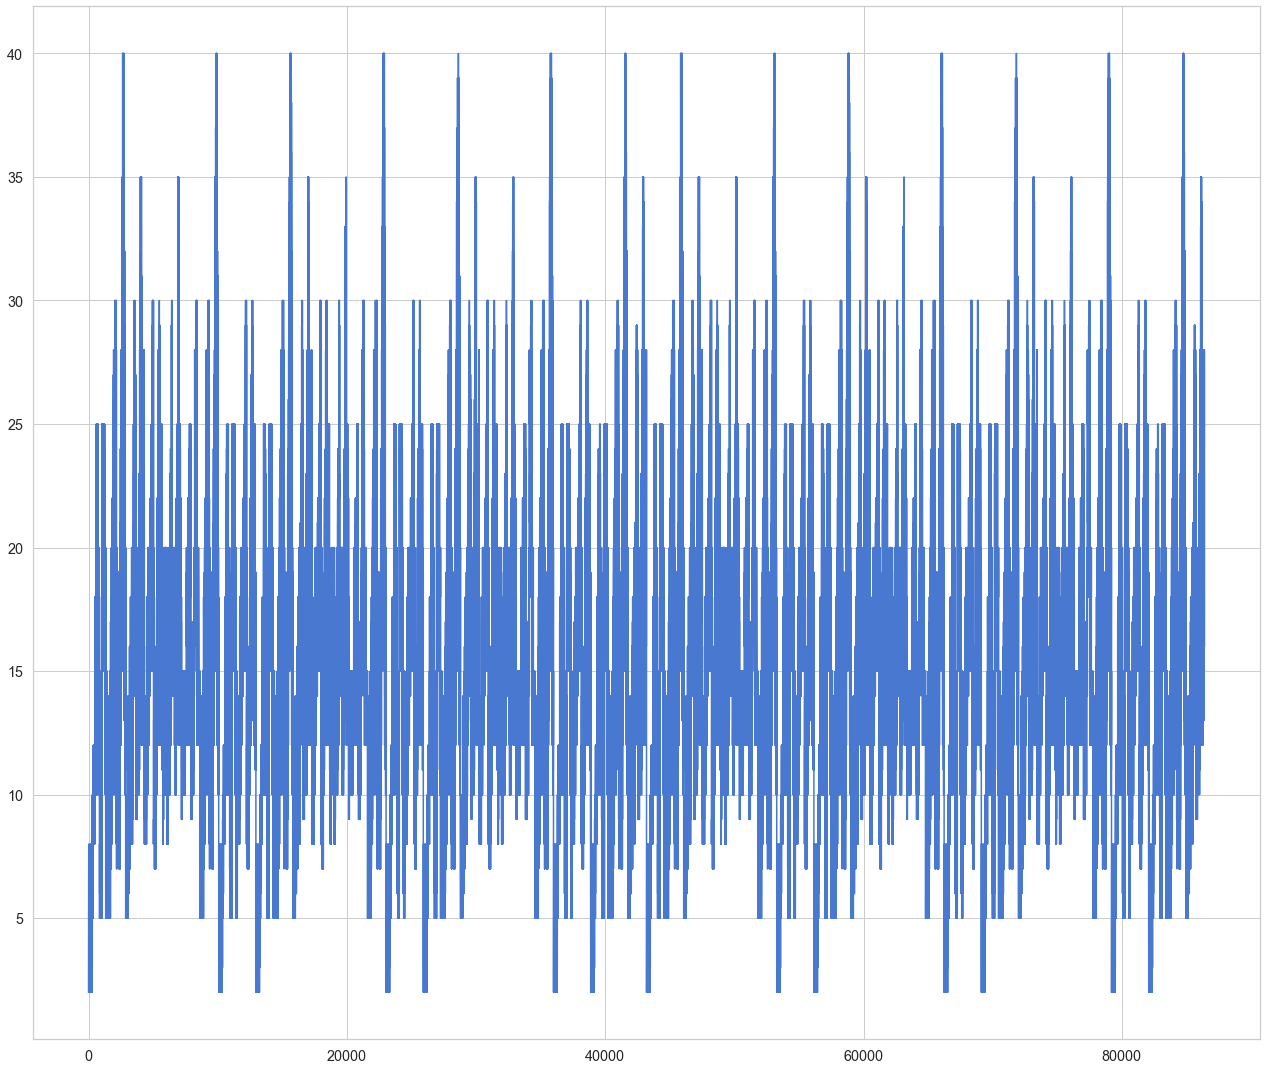

In [27]:
plt.plot(scaler.inverse_transform(mms_y))
plt.show()

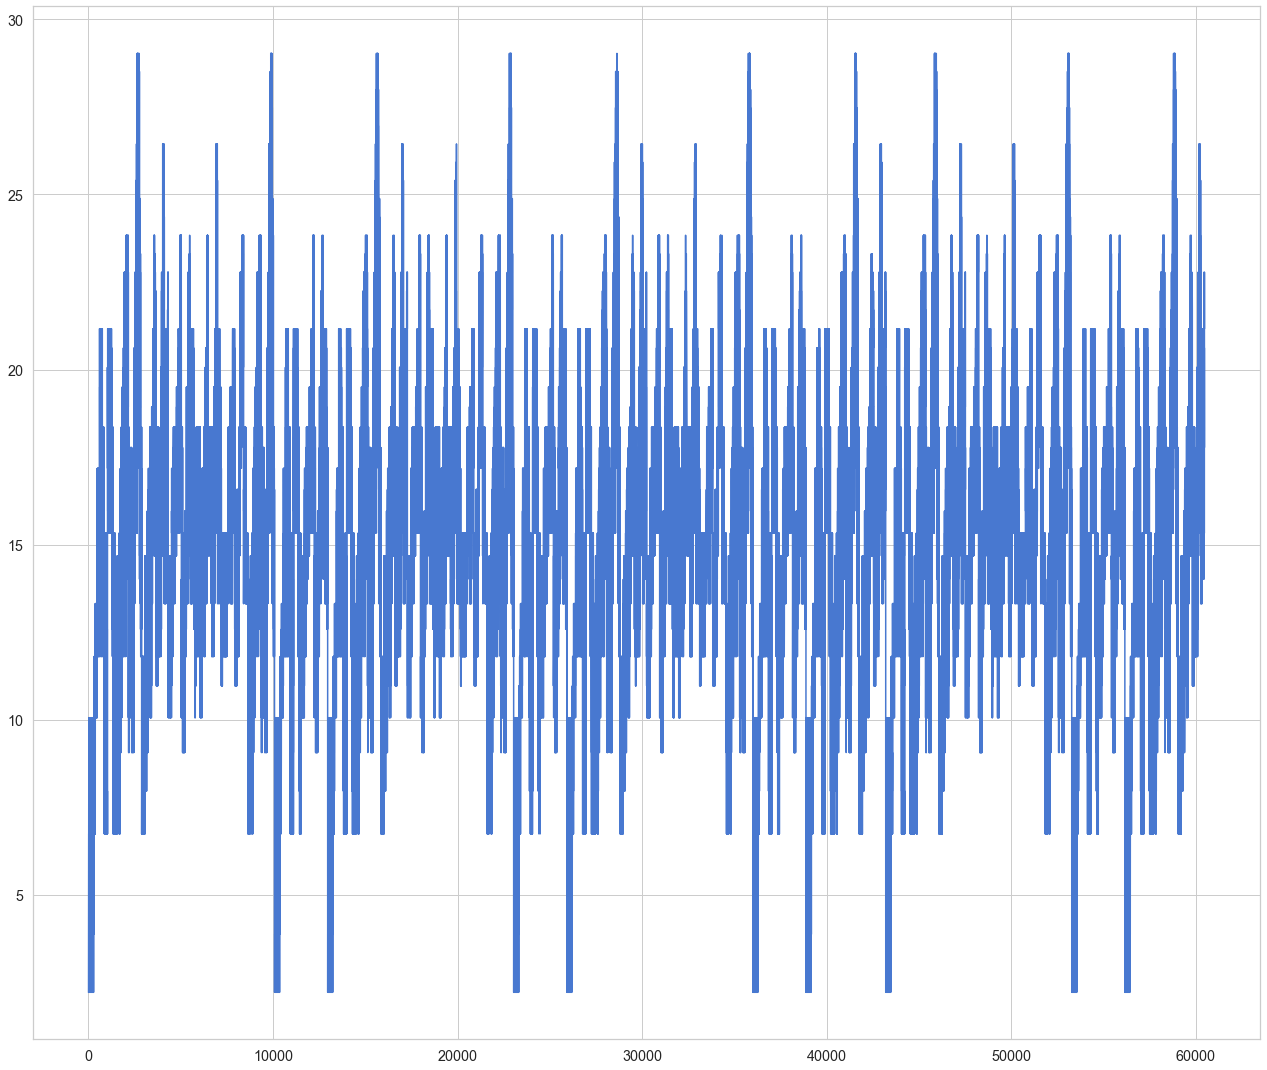

In [28]:
plt.plot(trainPredictPlot)
plt.show()

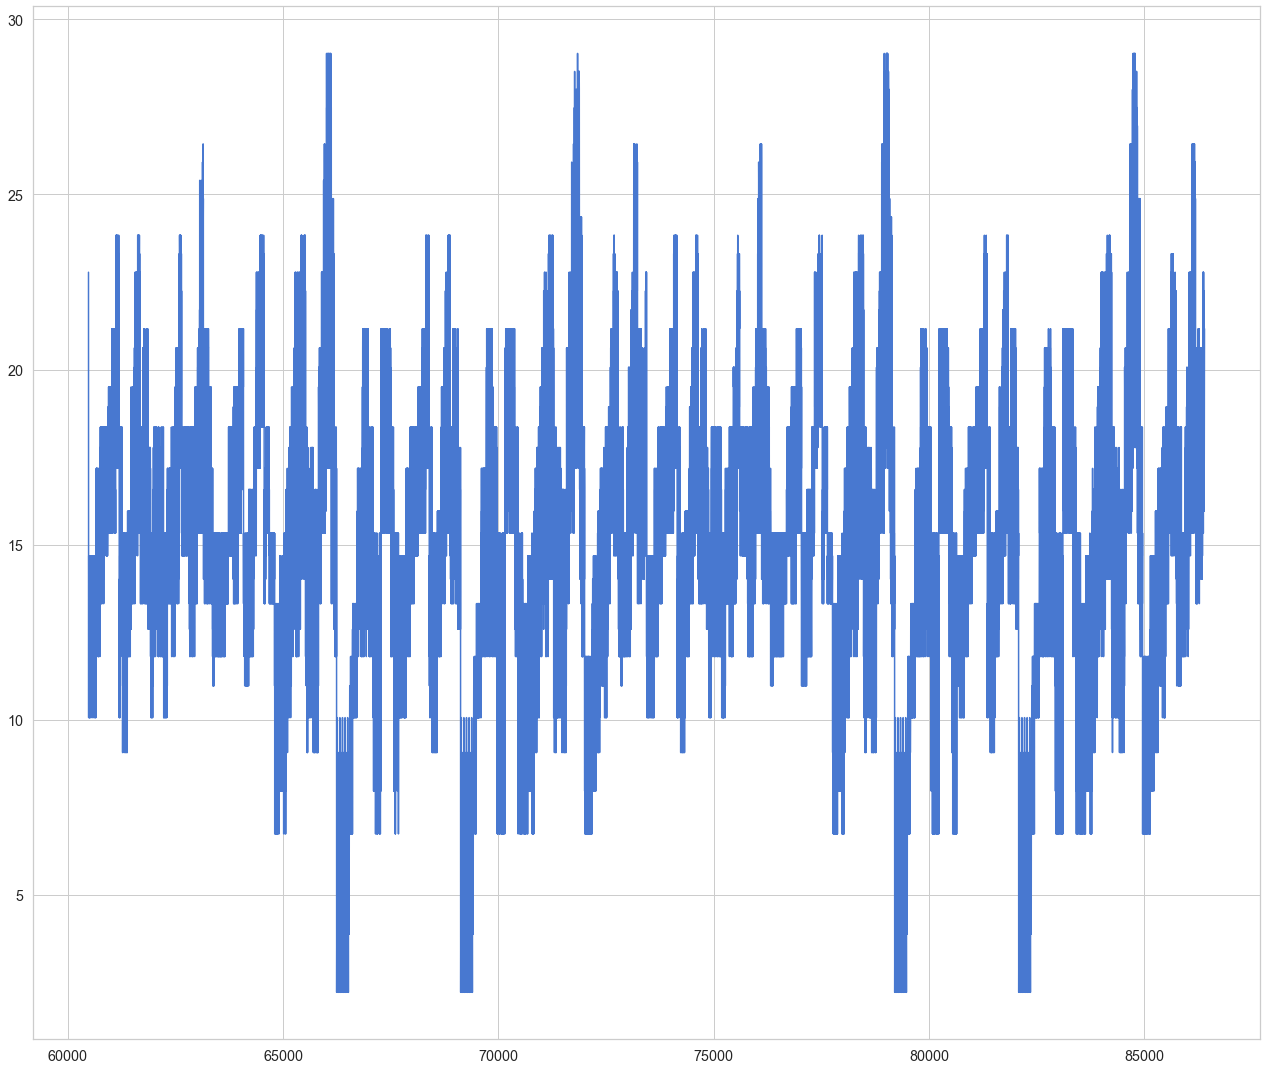

In [29]:
plt.plot(testPredictPlot)
plt.show()

In [32]:
prediction = pd.DataFrame(df_car_prediction, columns=['Time_step', 'Observed', 'Train_Prediction', 'Test_Prediction']).to_csv('prediction.csv')

In [36]:
df_df_sunspot_prediction = pd.DataFrame(data = {'Time_step':X,
                                             'Observed': y, 
                                             'Train_Prediction':trainPredictPlot[:,0], 
                                             'Test_Prediction':testPredictPlot[:,0]},
                                    index = y.index,) = pd.DataFrame(data = {'Time_step':X,
                                             'Observed': y, 
                                             'Train_Prediction':trainPredictPlot[:,0], 
                                             'Test_Prediction':testPredictPlot[:,0]},
                                    index = y.index,)

SyntaxError: can't assign to function call (<ipython-input-36-cb6d78ea4941>, line 1)

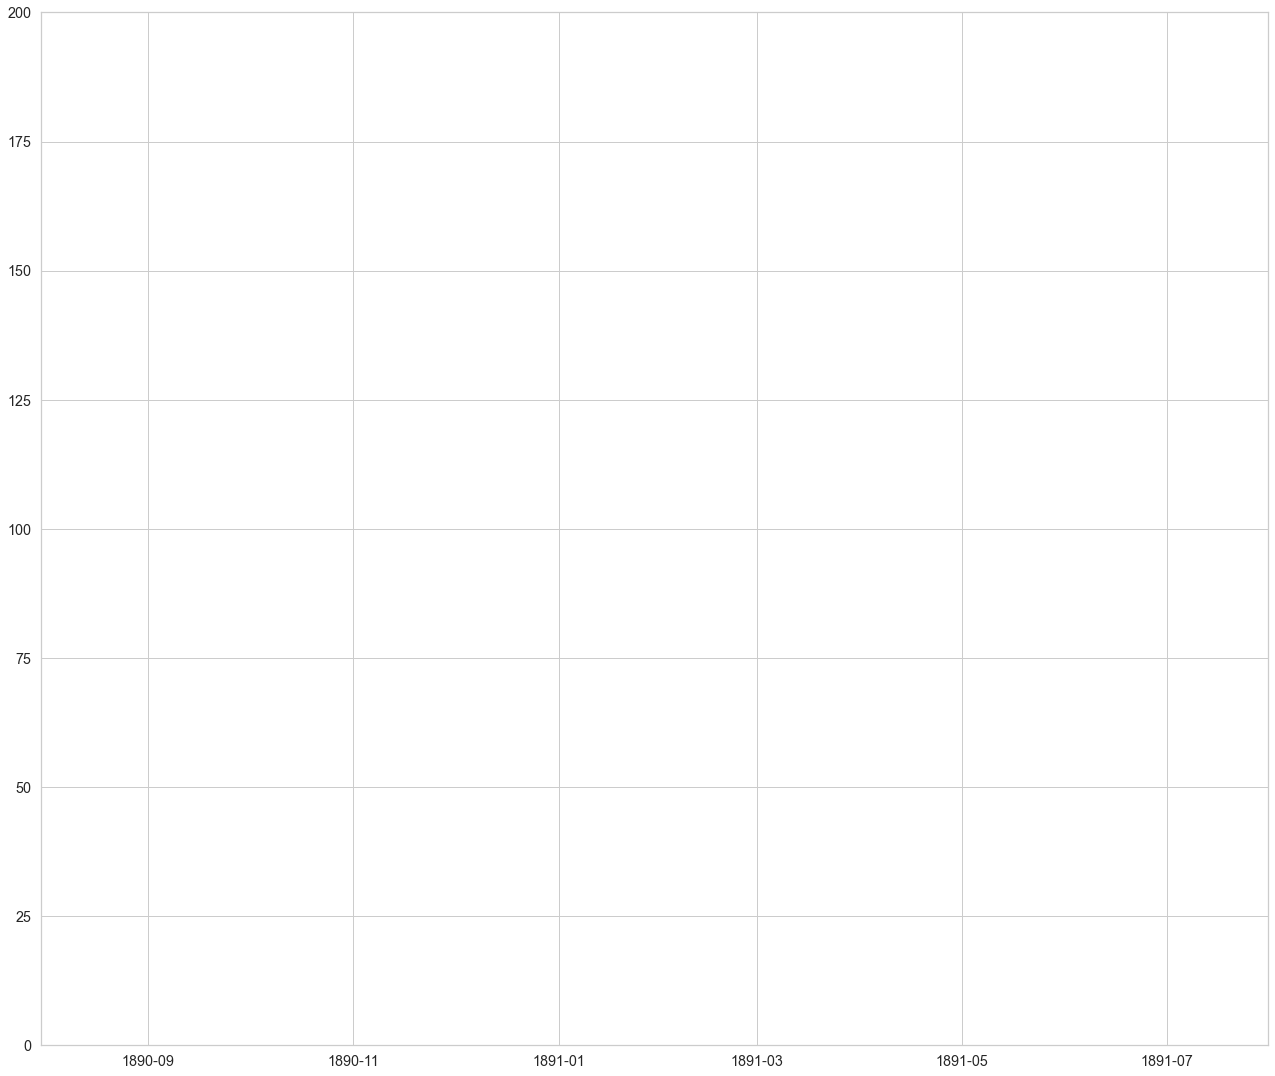

In [37]:
plt.scatter(df_car_prediction.index, df_car_prediction.Observed, 
            c = 'blue')
plt.scatter(df_car_prediction.index, df_car_prediction.Train_Prediction, 
            marker = 'x', c = 'green', alpha = 0.75)
plt.xlim('1890-07-31', '1891-07-31')
plt.ylim(0, 200)
plt.show()

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train, epochs=100, batch_size= 64, verbose= 1 , validation_data=(x_test,y_test))

Epoch 1/100


ValueError: in user code:

    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    D:\anaconda\envs\tfenv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:227 assert_input_compatibility
        ', found shape=' + str(shape))

    ValueError: Input 0 is incompatible with layer sequential_8: expected shape=(None, None, 32340), found shape=[None, 32340, 1]


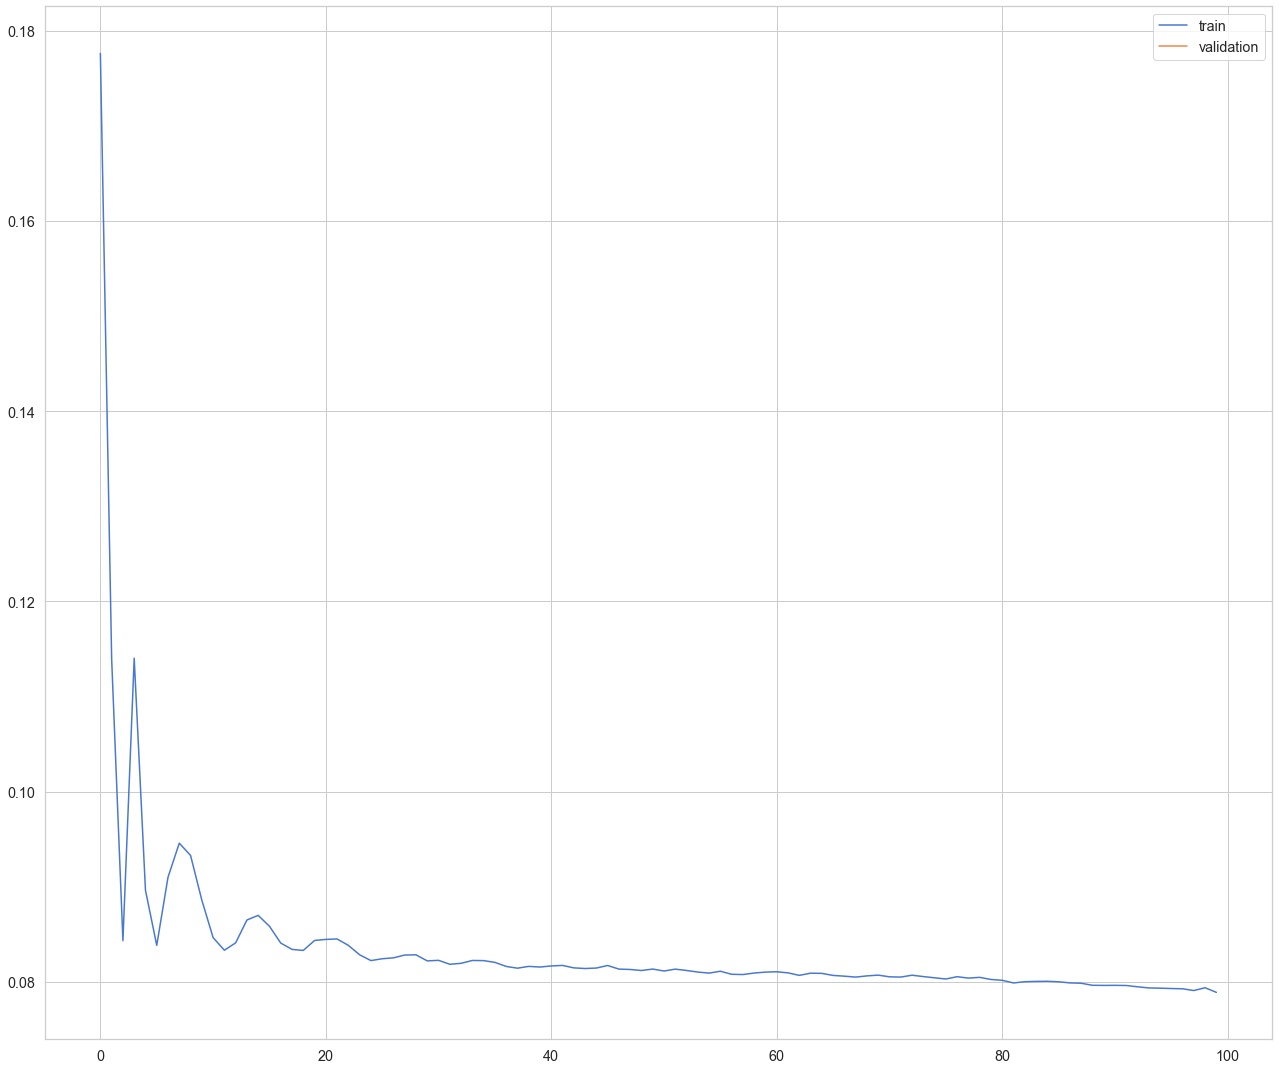

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();


y_predict_true:
(1, 41761, 1)
y_predict_model: 
(1, 41761, 1)
[[[-0.03632682]
  [-0.05881361]
  [-0.08344321]
  ...
  [-0.26375407]
  [-0.2603474 ]
  [-0.25657716]]]
test length: 10801


D:\anaconda\envs\tfenv\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
D:\anaconda\envs\tfenv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less


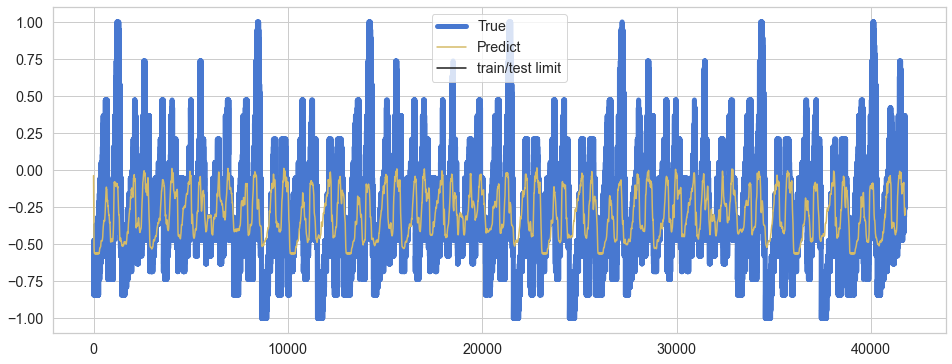

D:\anaconda\envs\tfenv\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
D:\anaconda\envs\tfenv\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less


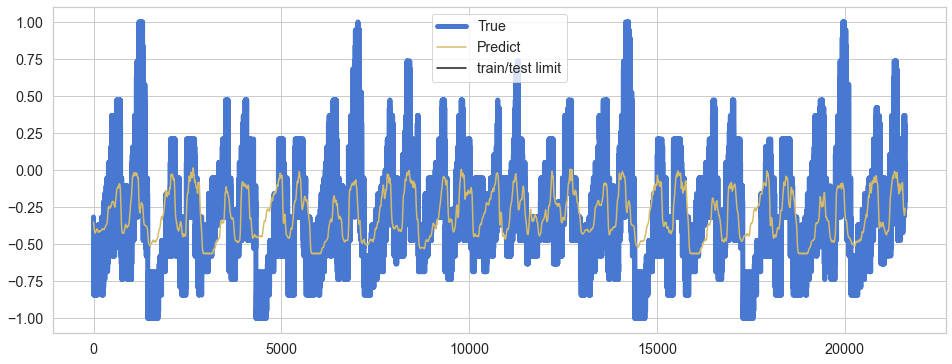

ValueError: Must pass 2-d input. shape=(1, 41761, 1)

In [19]:
y_predict_model = model.predict(x_predict)

print("\ny_predict_true:")
print (y_predict_true.shape)
print("y_predict_model: ")
print (y_predict_model.shape)

print(y_predict_model)

def plot(true, predicted, divider):

    predict_plot = scaler.inverse_transform(predicted[0])
    true_plot = scaler.inverse_transform(true[0])

    predict_plot = predict_plot[:,0]
    true_plot = true_plot[:,0]

    plt.figure(figsize=(16,6))
    plt.plot(true_plot, label='True',linewidth=5)
    plt.plot(predict_plot,  label='Predict',color='y')

    if divider > 0:
        maxVal = max(true_plot.max(),predict_plot.max())
        minVal = min(true_plot.min(),predict_plot.min())

        plt.plot([divider,divider],[minVal,maxVal],label='train/test limit',color='k')

    plt.legend()
    plt.show()

test_size = n_rows - train_size
print("test length: " + str(test_size))

plot(y_predict_true,y_predict_model,train_size)
plot(y_predict_true[:,-2*test_size:],y_predict_model[:,-2*test_size:],test_size)

prediction = pd.DataFrame(y_predict_model, columns=['Timestamp', 'Car_count']).to_csv('prediction.csv')